# Prodigy Infotech Task - 05

## Problem Statement : 
###                  Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load and read the file
df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [4]:
#shape/ size of the data
df.shape

(12316, 32)

In [5]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [9]:
df.dtypes.value_counts()

object    30
int64      2
Name: count, dtype: int64

In [10]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [11]:
df.drop(["Service_year_of_vehicle","Defect_of_vehicle","Work_of_casuality","Fitness_of_casuality","Time"],axis=1,inplace=True)

In [12]:
df.dropna(axis = 0, inplace = True)

In [13]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [14]:
df.shape

(8439, 27)

In [15]:
#finding duplicate values
df.duplicated().sum()

np.int64(0)

In [16]:
# Seperate numerical and categorical columns
categorical = df.select_dtypes(include = 'object').columns
categorical

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [17]:
numerical = df.select_dtypes(exclude = 'object').columns
numerical

Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')

# EDA

### Numerical vs Numerical graph

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

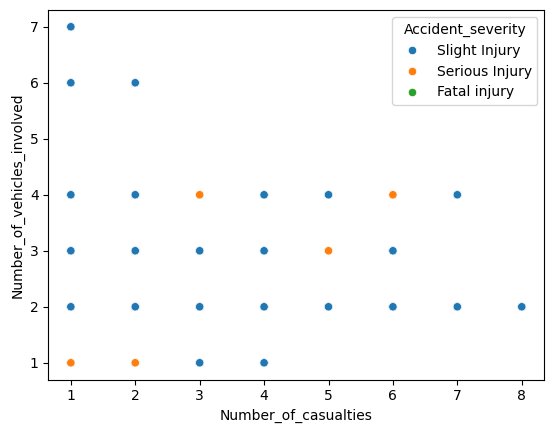

In [18]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])

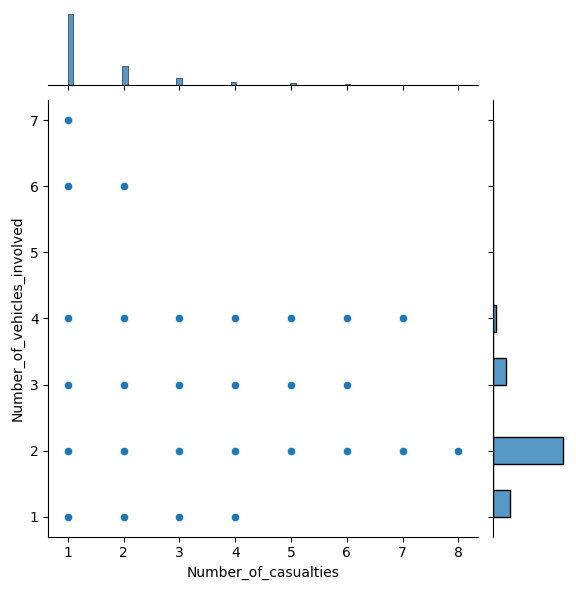

In [19]:
#joint Plot
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)

In [20]:
#Distribution of Accident severity
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     7169
Serious Injury    1171
Fatal injury        99
Name: count, dtype: int64

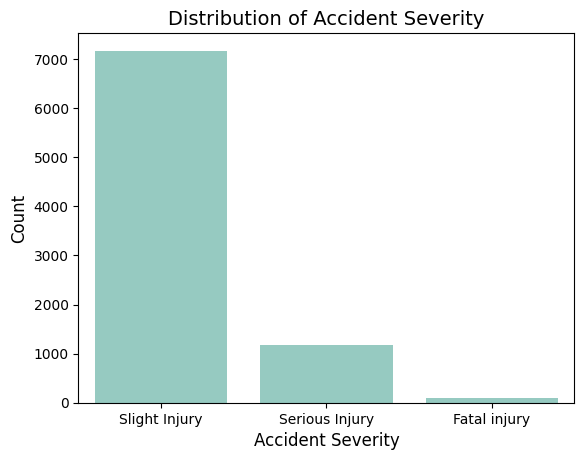

In [21]:
sns.set_palette('Set3')

sns.countplot(x=df['Accident_severity'])
plt.title('Distribution of Accident Severity', fontsize=14)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

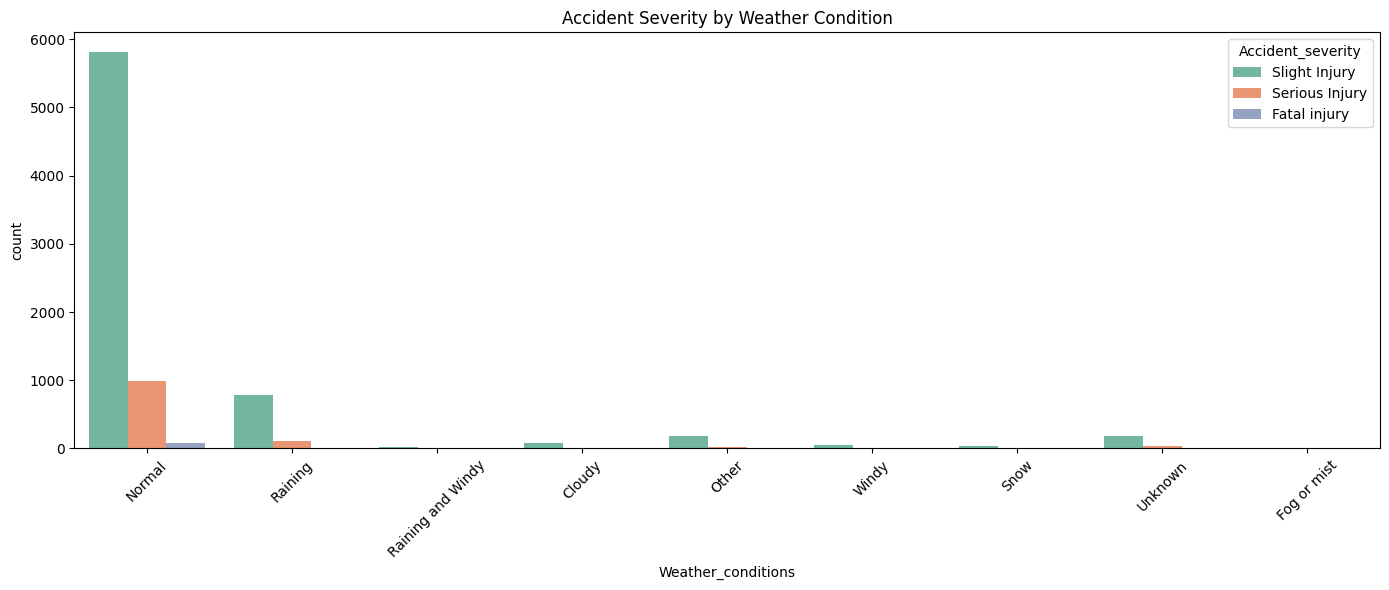

In [22]:
# Weather condition vs Accident Severity
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity', palette='Set2')
plt.xticks(rotation=45)
plt.title('Accident Severity by Weather Condition')
plt.tight_layout()
plt.show()

In [23]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
correlation_matrix

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.224609
Number_of_casualties,0.224609,1.000000


<Axes: >

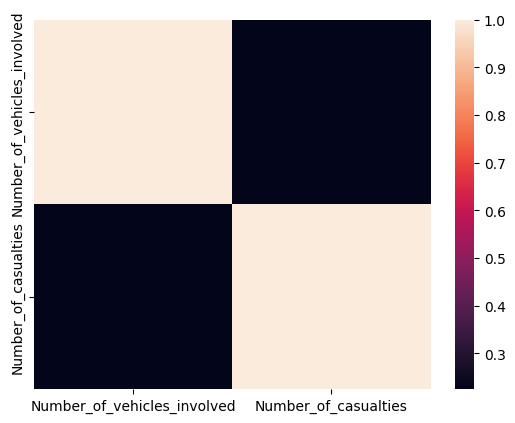

In [24]:
sns.heatmap(correlation_matrix)

Most accidents are occured when 2 vehicles are involved and 1 casuality is happend mostly in the accidents.


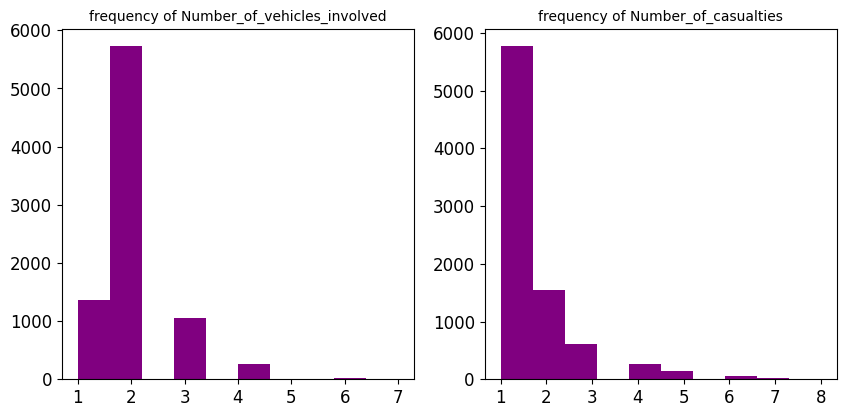

In [25]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='purple')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

print("Most accidents are occured when 2 vehicles are involved and 1 casuality is happend mostly in the accidents.")

## Categorical vs Categorical Graph

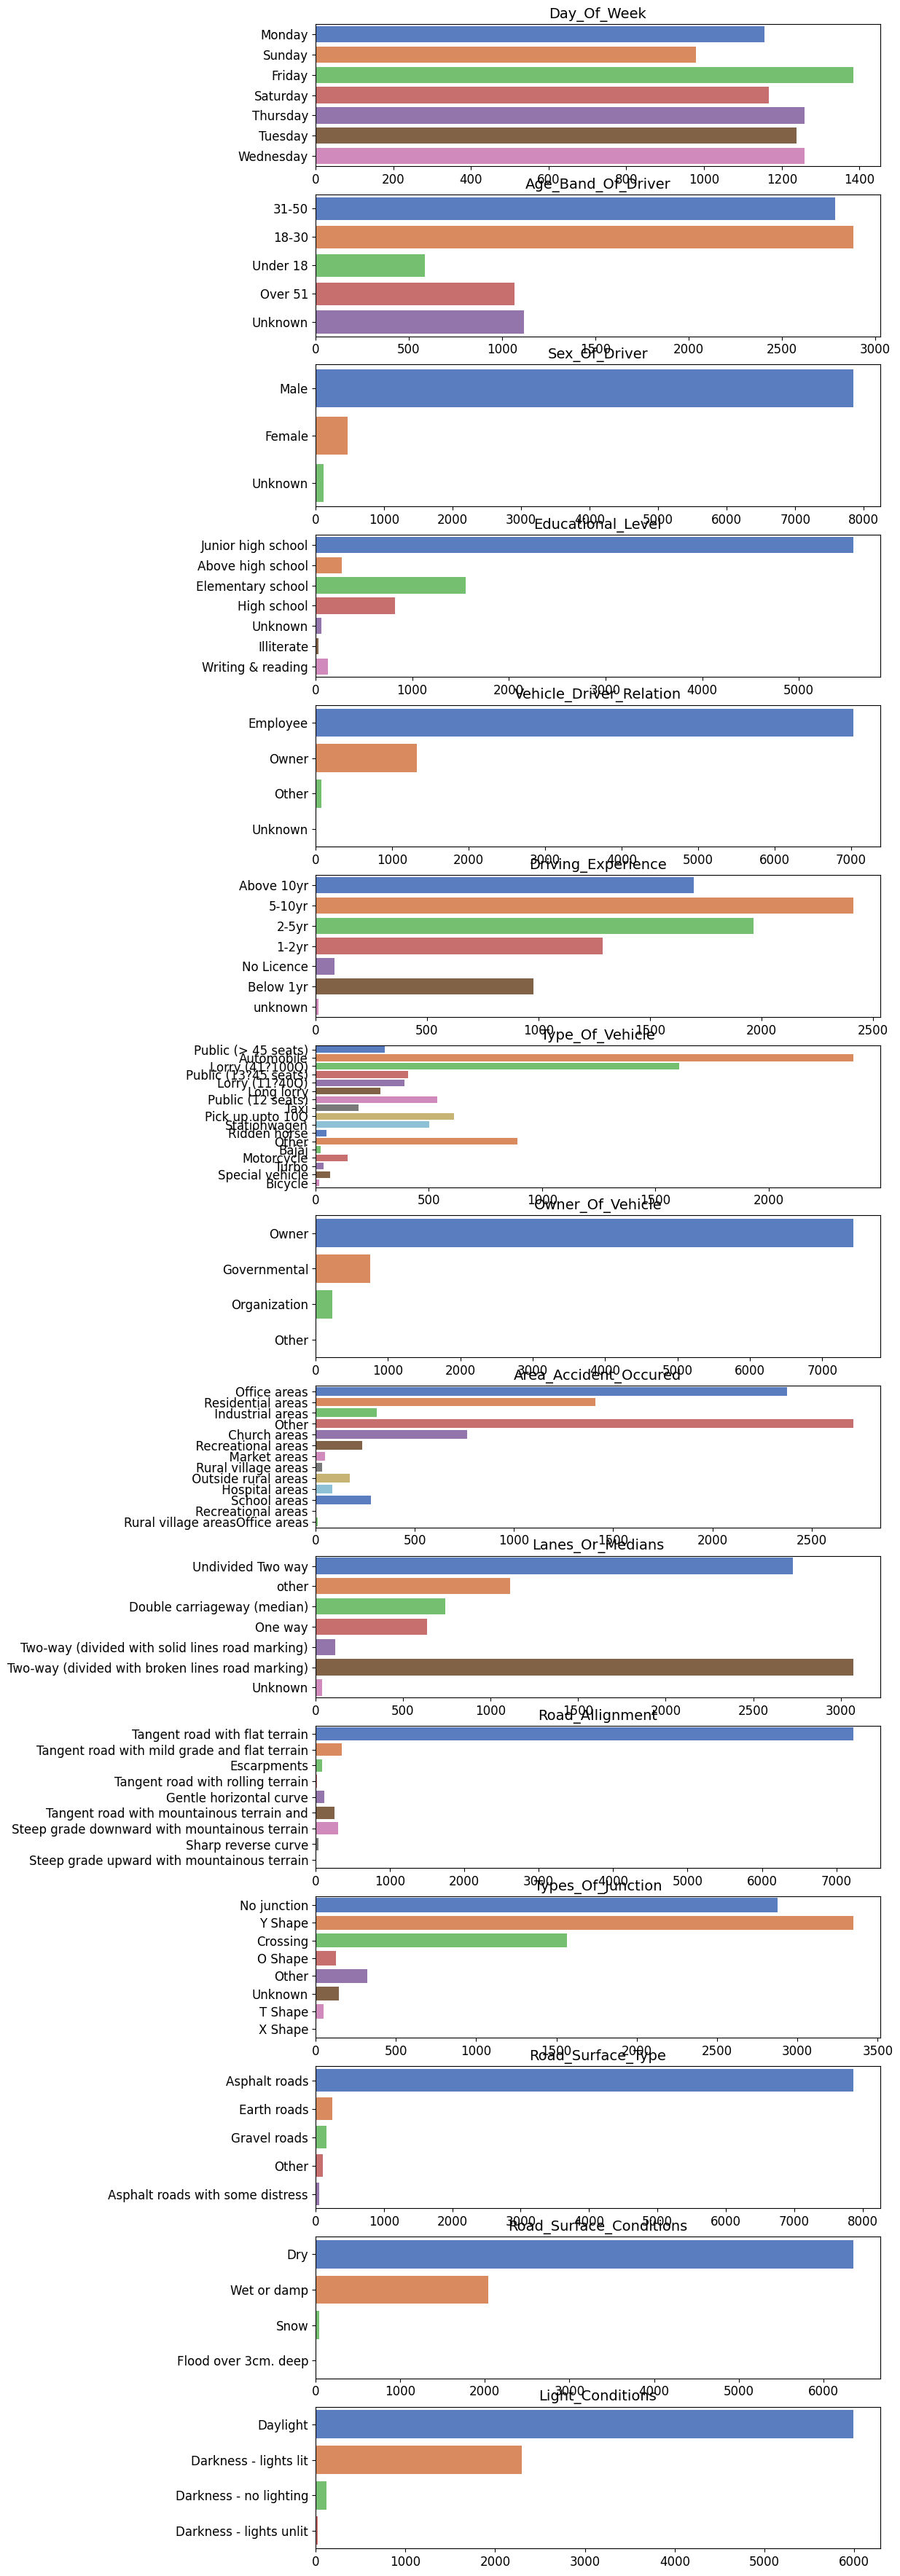

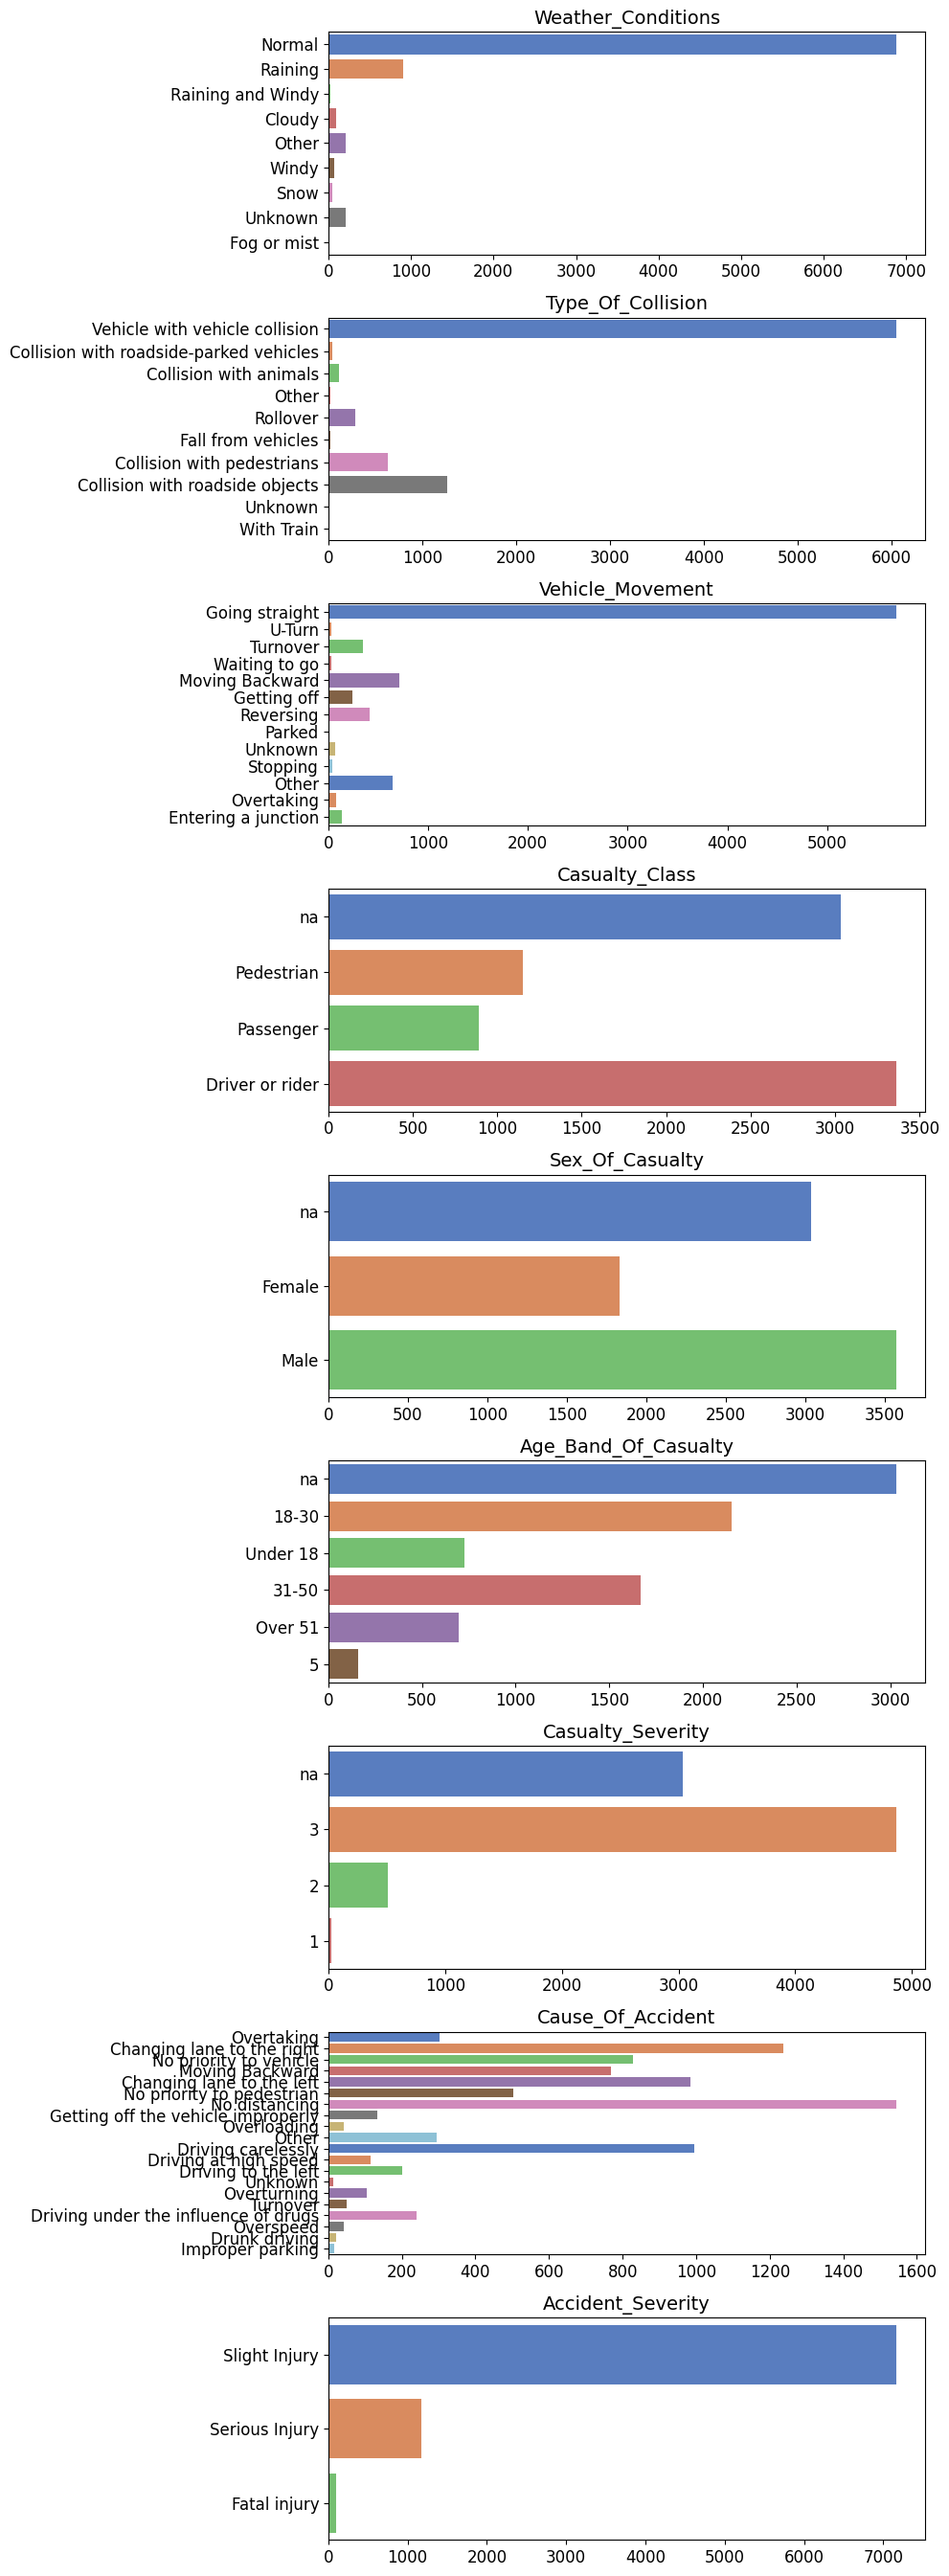

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_cats = [col for col in categorical if col != 'Pedestrian_movement']
cols_per_fig = 15 

for batch_start in range(0, len(filtered_cats), cols_per_fig):
    batch = filtered_cats[batch_start:batch_start + cols_per_fig]
    n = len(batch)
    
    plt.figure(figsize=(10, n * 3)) 
    
    for i, col in enumerate(batch, start=1):
        plt.subplot(n, 1, i)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    
plt.tight_layout()
plt.show()

## Handling Categorical Values

In [27]:
#importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [28]:
#confirming the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8439 entries, 0 to 8438
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              8439 non-null   int64
 1   Age_band_of_driver       8439 non-null   int64
 2   Sex_of_driver            8439 non-null   int64
 3   Educational_level        8439 non-null   int64
 4   Vehicle_driver_relation  8439 non-null   int64
 5   Driving_experience       8439 non-null   int64
 6   Type_of_vehicle          8439 non-null   int64
 7   Owner_of_vehicle         8439 non-null   int64
 8   Area_accident_occured    8439 non-null   int64
 9   Lanes_or_Medians         8439 non-null   int64
 10  Road_allignment          8439 non-null   int64
 11  Types_of_Junction        8439 non-null   int64
 12  Road_surface_type        8439 non-null   int64
 13  Road_surface_conditions  8439 non-null   int64
 14  Light_conditions         8439 non-null   int64
 15  Weat

### Correlation

<Axes: >

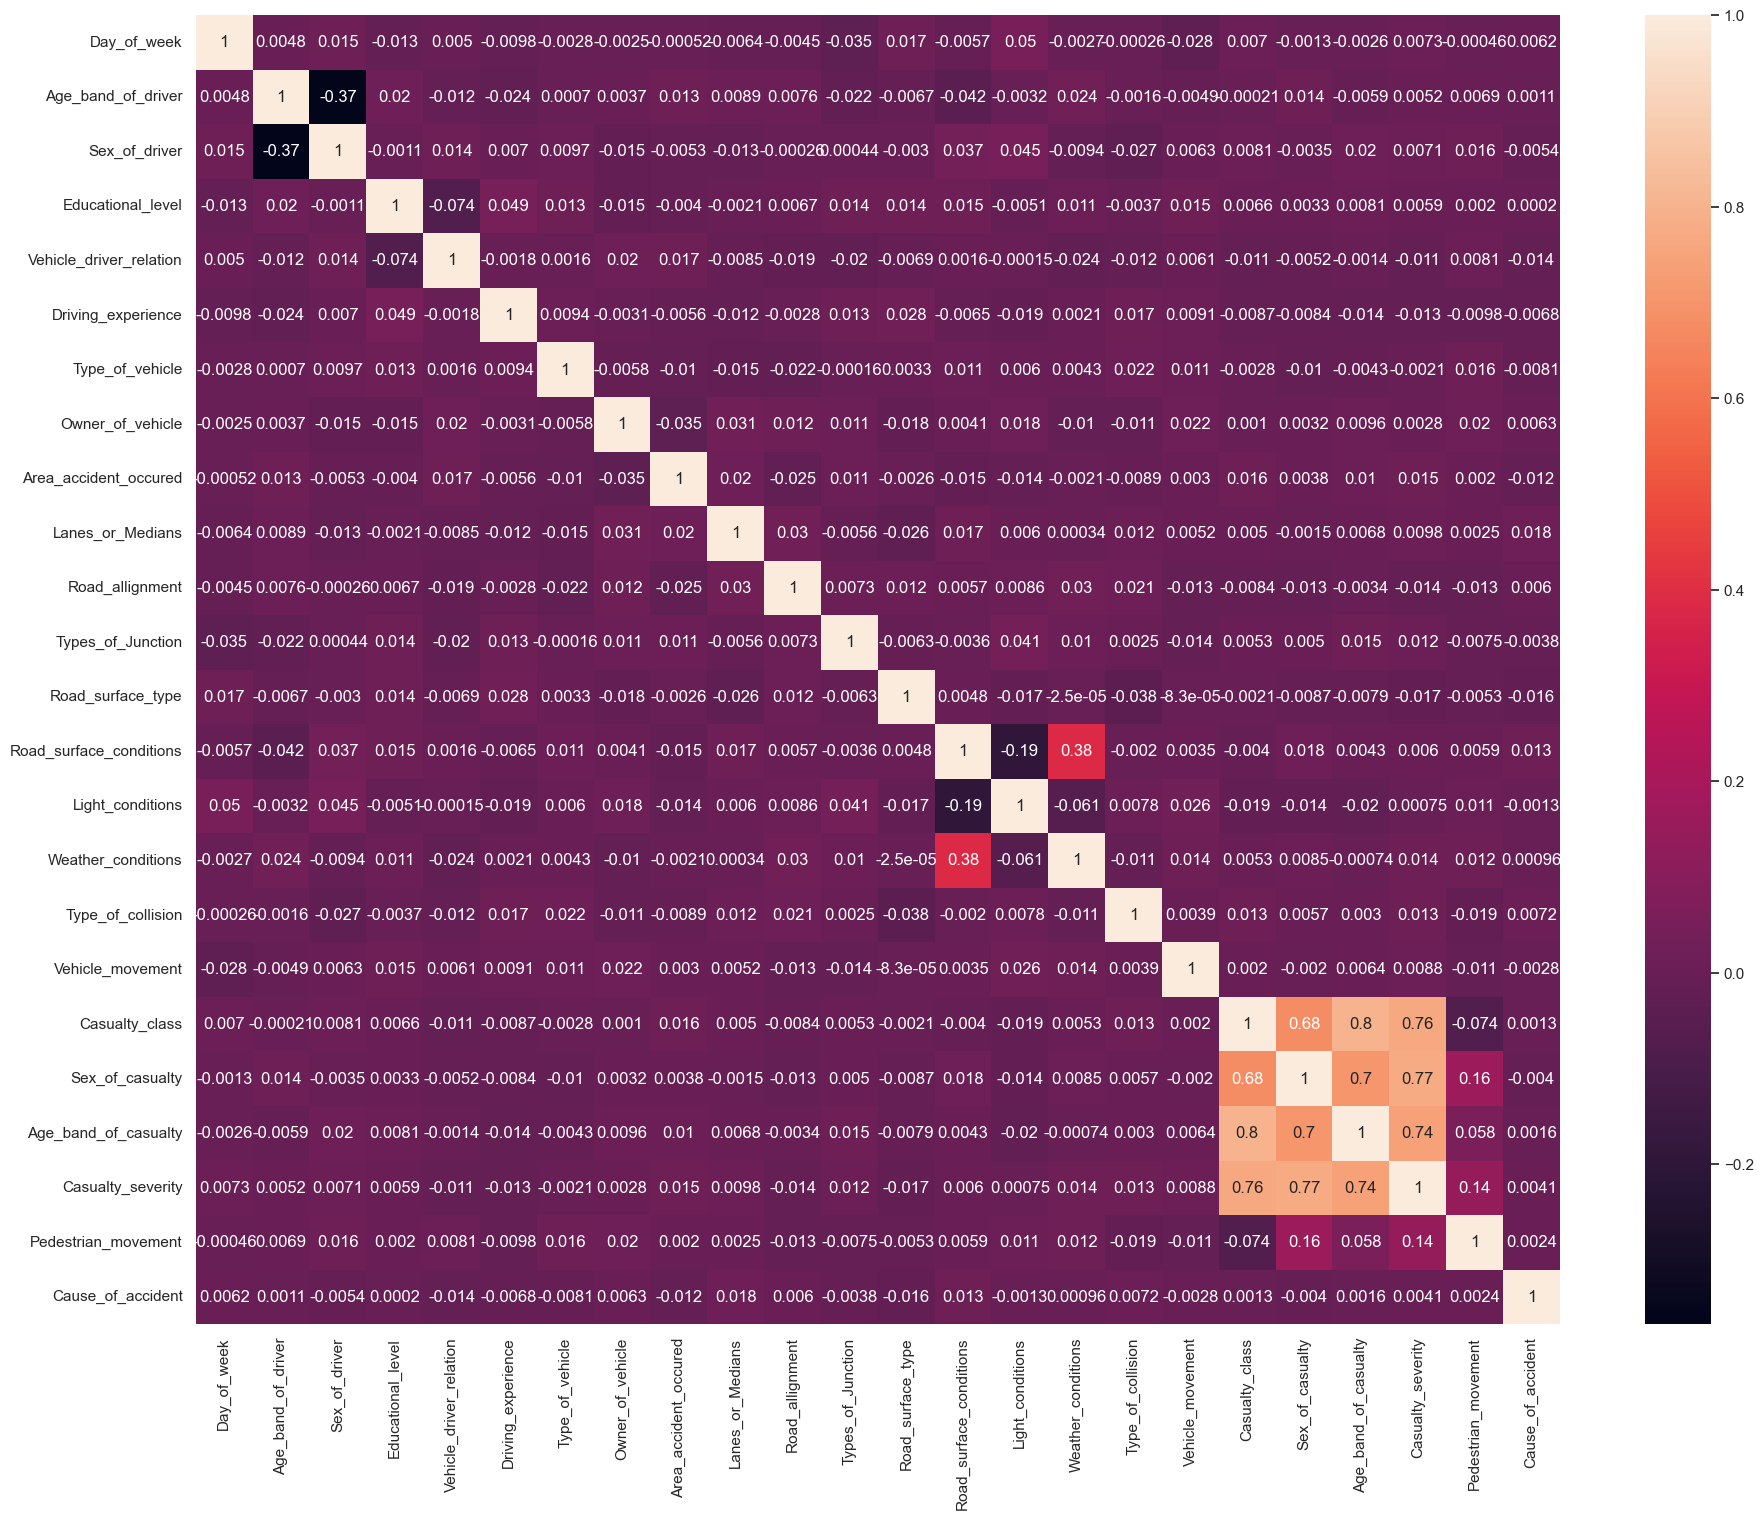

In [29]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)

In [30]:
#label encoded data set
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
1,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
2,0,0,1,4,0,1,0,0,9,6,...,3,2,8,10,3,2,5,3,5,12
3,0,0,1,4,0,3,5,3,4,6,...,3,2,3,2,2,1,4,2,0,1
4,0,0,1,4,0,0,0,3,9,4,...,3,2,3,10,1,1,0,2,5,9


In [31]:
#import chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [32]:
#f_p_values will return Fscore and pvalues
f_p_values

(array([ 2.47767605,  5.78346135,  0.09312868,  0.16331831,  3.06588096,
         3.47953764,  3.6077815 ,  1.18568225,  2.58809966,  3.38198009,
         0.27864881,  0.59782887,  9.09953061,  1.72727079,  9.43876942,
         1.66459564, 10.37590391,  1.6288337 ,  0.42820635,  0.65431678,
         3.17162687,  0.1314982 ,  0.22303911,  1.22412276]),
 array([0.28972067, 0.05548011, 0.95450315, 0.92158602, 0.21589988,
        0.17556098, 0.164657  , 0.55275461, 0.27415824, 0.18433693,
        0.86994577, 0.74162286, 0.01056968, 0.42162651, 0.00892067,
        0.43504847, 0.00558343, 0.44289753, 0.80726509, 0.72096954,
        0.20478115, 0.93636577, 0.8944739 , 0.54223197]))

In [33]:
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Day_of_week,2.477676,0.289721
1,Age_band_of_driver,5.783461,0.055480
2,Sex_of_driver,0.093129,0.954503
3,Educational_level,0.163318,0.921586
4,Vehicle_driver_relation,3.065881,0.215900
5,Driving_experience,3.479538,0.175561
6,Type_of_vehicle,3.607781,0.164657
7,Owner_of_vehicle,1.185682,0.552755
8,Area_accident_occured,2.588100,0.274158
9,Lanes_or_Medians,3.381980,0.184337


In [34]:
#since we want lower Pvalues we are sorting the features
print("we need higher Fscore and lower the Pvalues, so by evaluating, we can remove Owner_of_vehicle, Type_of_vehicle, Road_surface_conditions, Pedestrian_movement,Casualty_severity,Educational_level,Day_of_week,Sex_of_driver,Road_allignment, Sex_of_casualty")
f_p_values1.sort_values(by='Pvalues',ascending=True)

we need higher Fscore and lower the Pvalues, so by evaluating, we can remove Owner_of_vehicle, Type_of_vehicle, Road_surface_conditions, Pedestrian_movement,Casualty_severity,Educational_level,Day_of_week,Sex_of_driver,Road_allignment, Sex_of_casualty


,features,Fscore,Pvalues
16,Type_of_collision,10.375904,0.005583
14,Light_conditions,9.438769,0.008921
12,Road_surface_type,9.099531,0.010570
1,Age_band_of_driver,5.783461,0.055480
6,Type_of_vehicle,3.607781,0.164657
5,Driving_experience,3.479538,0.175561
9,Lanes_or_Medians,3.381980,0.184337
20,Age_band_of_casualty,3.171627,0.204781
4,Vehicle_driver_relation,3.065881,0.215900
8,Area_accident_occured,2.588100,0.274158


In [35]:
#after evaluating we are removing lesser important columns and storing to a new data frame
df2=df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df2.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
7,18-30,Employee,2-5yr,Residential areas,other,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,1,U-Turn,na,na,No priority to vehicle,Slight Injury
8,18-30,Employee,Above 10yr,Industrial areas,other,Y Shape,Earth roads,Daylight,Normal,Collision with roadside-parked vehicles,2,1,Going straight,Pedestrian,Under 18,Changing lane to the right,Slight Injury
9,18-30,Employee,1-2yr,Residential areas,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,1,U-Turn,Passenger,18-30,Moving Backward,Serious Injury


In [36]:
df2.shape

(8439, 17)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8439 entries, 1 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           8439 non-null   object
 1   Vehicle_driver_relation      8439 non-null   object
 2   Driving_experience           8439 non-null   object
 3   Area_accident_occured        8439 non-null   object
 4   Lanes_or_Medians             8439 non-null   object
 5   Types_of_Junction            8439 non-null   object
 6   Road_surface_type            8439 non-null   object
 7   Light_conditions             8439 non-null   object
 8   Weather_conditions           8439 non-null   object
 9   Type_of_collision            8439 non-null   object
 10  Number_of_vehicles_involved  8439 non-null   int64 
 11  Number_of_casualties         8439 non-null   int64 
 12  Vehicle_movement             8439 non-null   object
 13  Casualty_class               8439 non

In [38]:
#to check distinct values in each categorical columns we are storing them to a new variable
categorical_new=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_new)

['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity']


In [39]:
for i in categorical_new:
    print(df2[i].value_counts())

Age_band_of_driver
18-30       2883
31-50       2786
Unknown     1118
Over 51     1066
Under 18     586
Name: count, dtype: int64
Vehicle_driver_relation
Employee    7031
Owner       1324
Other         82
Unknown        2
Name: count, dtype: int64
Driving_experience
5-10yr        2412
2-5yr         1963
Above 10yr    1698
1-2yr         1289
Below 1yr      977
No Licence      85
unknown         15
Name: count, dtype: int64
Area_accident_occured
Other                              2710
Office areas                       2375
Residential areas                  1411
 Church areas                       766
 Industrial areas                   308
School areas                        280
  Recreational areas                237
 Outside rural areas                172
 Hospital areas                      85
  Market areas                       48
Rural village areas                  34
Rural village areasOffice areas      12
Recreational areas                    1
Name: count, dtype: int64
Lanes_

In [40]:
#get_dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
#concatinate dummy and old data frame
df3=pd.concat([df2,dummy],axis=1)
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,True,False,False,False
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,False,False,False,False
7,18-30,Employee,2-5yr,Residential areas,other,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,False,False,True,False,False,False,False,False,False,False
8,18-30,Employee,Above 10yr,Industrial areas,other,Y Shape,Earth roads,Daylight,Normal,Collision with roadside-parked vehicles,...,False,False,False,False,False,False,False,False,False,False
9,18-30,Employee,1-2yr,Residential areas,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#dropping dummied columns
df3.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)
df3.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,2,2,Slight Injury,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2,1,Slight Injury,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,2,1,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2,1,Serious Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
x=df3.drop(['Accident_severity'],axis=1)
x.shape

(8439, 103)

In [45]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
1,2,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2,1,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
8,2,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
y=df3.iloc[:,2]
y.head()

1     Slight Injury
3     Slight Injury
7     Slight Injury
8     Slight Injury
9    Serious Injury
Name: Accident_severity, dtype: object

In [47]:
#checking the count of each item in the output column
y.value_counts()

Accident_severity
Slight Injury     7169
Serious Injury    1171
Fatal injury        99
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

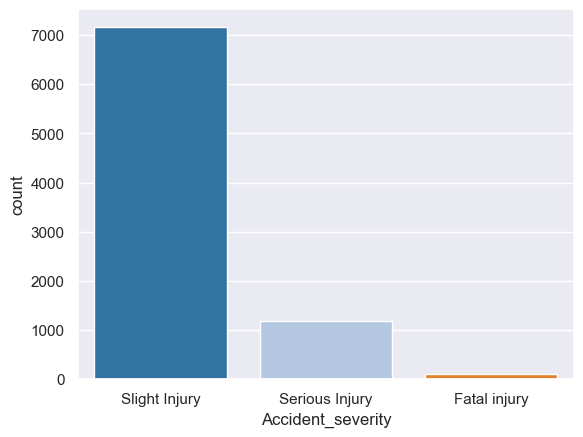

In [53]:
#plotting count plot using seaborn
sns.countplot(x = y, palette='tab20')

In [55]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
#importing SMOTE 
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [57]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

Accident_severity
Fatal injury         7169
Serious Injury       7169
Slight Injury        7169
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

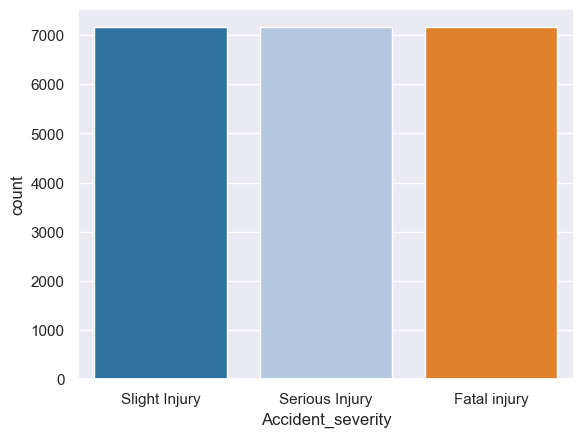

In [58]:
sns.countplot(x = yo, palette='tab20')

In [59]:
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)

In [60]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(15054, 103) (6453, 103) (15054,) (6453,)


### KNN Model Prediction

In [61]:
#KNN model 
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
y_pred

array(['Serious Injury', 'Slight Injury', 'Fatal injury', ...,
       'Fatal injury', 'Serious Injury', 'Serious Injury'], dtype=object)

##### Checking Accuracy, Classification Report, Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [69]:
print("Classification Report")

Classification Report


In [70]:
report_KNN=classification_report(y_test,y_pred)
print(report_KNN)

                precision    recall  f1-score   support

  Fatal injury       0.81      1.00      0.89      2150
Serious Injury       0.62      0.91      0.74      2146
 Slight Injury       0.98      0.29      0.45      2157

      accuracy                           0.73      6453
     macro avg       0.80      0.73      0.69      6453
  weighted avg       0.80      0.73      0.69      6453



In [67]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.7340771734077174

[[2149    1    0]
 [ 174 1960   12]
 [ 345 1184  628]] 



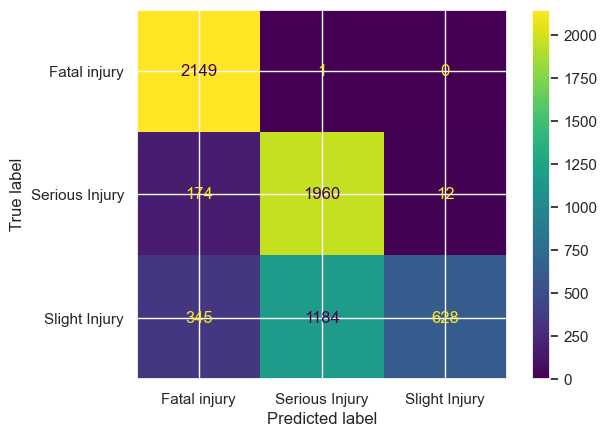

In [71]:
matrix_KNN=confusion_matrix(y_test,y_pred)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))